In [1]:
import pandas as pd
import numpy as np
import pickle
import re
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats.mstats import winsorize

In [2]:
# Display setting for dataframe in notebook
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 150)
decimal = 5
pd.set_option('display.float_format', lambda x: f'%.{decimal}f' % x)

# Import Data

In [3]:
longlist_feat = pd.read_excel("./data/longlist_features.xlsx")

In [4]:
longlist_feat

,Ticker,mscore,fscore,zscore,OP/SAL,EBIT/TA,GP/FA,NI/CS,GP/SAL,GP/TA,NI/EQ,CS/GP,GP/CS,NI/TA,OP/GP,RE/TA,NI/SAL,TAc/TA,CFO/CS,CFO/SAL,NI/CFO,CFO/TA,CFO/NI,LEV,WC/TA,CASH/CL,CASH/CA,CASH/TA,CA/CL,CL/TL,BV/TL,CA/TL,CFO/TL,EQ/TA,EQ/LA,(CA– INV)/CL,SAL/FA,SAL/TA,FA/TA,SAL/CS,SAL/COST,SAL/GA,INV/TA,INV/CA,INV/CS,REC/REV,DSRI,AQI,DEPI,TATA,GMI,SGI,SGAI,LVGI,RSST,REC,INV,SOFTASSETS,CASHSALES,ROA,ISSUE
0,A32,-2.79397,0.49848,6.76237,0.05785,0.08632,0.66586,-0.06488,0.10925,0.16301,0.17384,-8.15347,-0.12265,0.08623,0.52955,0.12661,0.05779,0.07747,-0.00659,0.00587,9.83866,0.00876,0.10164,0.50395,0.22653,0.18026,0.12436,0.09084,1.44950,1.00000,0.98431,1.44950,0.01739,0.49605,1.84050,0.67556,6.09490,1.49209,0.24481,0.99933,1.00778,1.15423,0.39003,0.53394,-0.29346,0.16720,0.96777,0.99271,1.00000,0.07756,0.99968,1.12064,0.86638,0.91858,0.10974,0.01868,-0.00349,0.66435,1.00673,0.01850,0
1,AAA,-3.86643,0.37259,5.22722,0.04767,0.04132,0.34603,-0.04257,0.10459,0.09066,0.07037,-8.56136,-0.11680,0.03304,0.45580,0.06637,0.03812,-0.03844,-0.09209,0.08246,0.46229,0.07148,2.16313,0.53043,0.08440,0.25544,0.21435,0.11246,1.19169,0.83002,0.88527,0.98913,0.13476,0.46957,0.98787,0.94074,3.30851,0.86687,0.26201,1.00622,1.02065,1.24760,0.11049,0.21059,-0.14234,0.24811,1.64481,0.75879,1.19164,-0.03016,1.00294,0.56521,0.80154,1.15014,-0.05532,-0.01360,-0.00544,0.62553,0.89798,-0.00068,0
2,AAM,-3.63254,0.88322,19.75009,-0.13155,-0.07543,0.01826,0.09912,0.00122,0.00070,-0.06166,-108.67831,-0.00122,-0.05677,-66.76214,-0.00949,-0.09900,0.05855,0.20135,-0.20111,0.49225,-0.11532,2.03148,0.07930,0.73892,1.69371,0.15331,0.12456,11.04784,0.92735,11.61010,10.24519,-1.45418,0.92070,4.90932,3.34679,15.01593,0.57341,0.03819,0.94544,0.91798,0.71142,0.56634,0.69706,-0.98886,0.14225,2.45637,0.94042,1.14033,0.03989,0.97273,0.90140,1.40563,2.41335,-0.01297,0.04579,0.16780,0.83726,0.91047,-0.05918,0
3,AAS,1.69346,0.32348,8.05510,0.02876,0.02223,5.10599,-0.00675,0.02221,0.01717,0.00959,-44.01779,-0.02272,0.00510,1.29493,0.04904,0.00660,-0.07023,-0.09969,0.09747,0.06773,0.07533,14.76504,0.46799,0.50338,0.85990,0.40713,0.38922,2.11212,0.96720,1.13682,2.04283,0.16096,0.53201,12.09566,2.11212,229.86042,0.77278,0.00336,0.50187,0.50985,1.11690,0.00000,0.00000,0.00000,0.20867,2.33362,15.56560,0.96160,-0.05310,0.75373,0.52516,0.89533,1.78564,-0.50930,0.01683,0.00000,0.60742,0.86904,-0.18822,0
4,AAT,-3.62432,0.19660,7.74551,0.08301,0.04110,0.12429,-0.05593,0.12573,0.06225,0.03304,-6.95349,-0.14381,0.02421,0.66023,0.13189,0.04890,0.02245,-0.00406,0.00355,13.77394,0.00176,0.07260,0.26718,0.13864,0.21399,0.11430,0.03402,1.87212,0.59499,2.74274,1.11389,0.00658,0.73282,1.04332,1.68777,0.98857,0.49511,0.50084,1.00375,0.99240,0.76007,0.02931,0.09847,-0.06770,0.52061,1.04716,0.59763,1.00000,0.03934,1.00175,0.60675,1.31566,0.81051,-0.22272,-0.09916,-0.00106,0.46514,0.96184,-0.01035,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1592,XPH,-2.79161,0.49522,27.57365,-0.06113,-0.01499,0.28628,-0.00112,0.23359,0.05727,0.00022,-3.28105,-0.30478,0.00021,-0.26169,-0.16045,0.00086,0.13606,0.72299,-0.55411,-0.00155,-0.13584,-136.24015,0.02639,0.34522,1.50844,0.10503,0.03897,14.36231,0.98090,21.60266,13.30638,-2.20922,0.95576,1.54808,9.72034,1.22556,0.24516,0.20004,1.13931,1.21254,1.40295,0.11993,0.32321,-0.63827,0.40467,0.91159,1.17857,0.94157,0.12086,1.06045,0.96749,0.71278,1.48537,0.05843,-0.01392,-0.02652,0.76099,1.07057,0.08148,0
1593,YBC,-3.15123,0.31644,1.40760,0.04478,0.04359,0.15412,-0.00231,0.07194,0.07004,0.01515,-12.90044,-0.07752,0.00209,0.62240,-0.03946,0.00215,0.02408,0.02434,-0.02259,-0.09507,-0.02199,-10.51819,0.86198,-0.33153,0.01160,0.01968,0.00938,0.58968,0.93734,0.16012,0.55273,-0.02551,0.13802,0.26362,0.28057,2.14234,0.97358,0.45444,1.00376,1.00114,0.91185,0.24974,0.52419,-0.27641,0.2260

In [5]:
longlist_feat.describe()

,mscore,fscore,zscore,OP/SAL,EBIT/TA,GP/FA,NI/CS,GP/SAL,GP/TA,NI/EQ,CS/GP,GP/CS,NI/TA,OP/GP,RE/TA,NI/SAL,TAc/TA,CFO/CS,CFO/SAL,NI/CFO,CFO/TA,CFO/NI,LEV,WC/TA,CASH/CL,CASH/CA,CASH/TA,CA/CL,CL/TL,BV/TL,CA/TL,CFO/TL,EQ/TA,EQ/LA,(CA– INV)/CL,SAL/FA,SAL/TA,FA/TA,SAL/CS,SAL/COST,SAL/GA,INV/TA,INV/CA,INV/CS,REC/REV,DSRI,AQI,DEPI,TATA,GMI,SGI,SGAI,LVGI,RSST,REC,INV,SOFTASSETS,CASHSALES,ROA,ISSUE
count,1597.00000,1595.00000,1597.00000,1597.00000,1597.00000,1597.00000,1597.00000,1597.00000,1597.00000,1597.00000,1597.00000,1597.00000,1597.00000,1597.00000,1597.00000,1597.00000,1597.00000,1597.00000,1597.00000,1597.00000,1597.00000,1597.00000,1597.00000,1597.00000,1597.00000,1597.00000,1597.00000,1597.00000,1597.00000,1597.00000,1597.00000,1597.00000,1597.00000,1597.00000,1597.00000,1597.00000,1597.00000,1597.00000,1597.00000,1597.00000,1597.00000,1597.00000,1597.00000,1597.00000,1597.00000,1597.00000,1597.00000,1597.00000,1597.00000,1597.00000,1597.00000,1597.00000,1597.00000,1597.00000,1597.00000,1597.00000,1597.00000,1597.00000,1597.00000,1597.00000
mean,-3.05968,1.59206,6.98939,-0.12555,0.04562,5.99177,-0.16718,0.19156,0.14464,0.07219,-8.74484,-0.31954,0.03285,-0.58190,-0.05902,-0.21130,-0.02357,-0.17304,-0.03565,0.27702,0.05477,0.16793,0.50910,0.15646,0.38370,0.15414,0.08100,2.43148,0.82094,2.47506,1.92870,0.17998,0.47103,2.27657,1.96147,49.44864,1.00377,0.22660,0.98848,0.98890,1.06234,0.15760,0.25721,-0.51276,1.09759,1.21223,1.55507,1.16998,-0.01012,0.99517,1.07790,1.11098,1.05004,-0.03754,-0.01417,-0.01768,0.68948,0.91337,-0.00668,0.00564
std,1.22533,15.68271,6.89976,1.52530,0.07665,21.61166,0.76289,0.20228,0.13395,0.15443,15.17564,0.49542,0.07691,7.35586,0.57038,2.09994,0.12829,1.16625,0.80221,3.92637,0.13008,18.61369,0.29299,0.39720,0.65244,0.16049,0.09204,3.00558,0.23886,4.16310,2.40281,0.56891,0.38854,3.70012,2.86391,192.13764,0.96033,0.22815,0.17954,0.18976,0.59128,0.15672,0.22083,1.61753,3.18530,1.02544,2.35273,0.83405,0.12514,0.07449,0.60600,0.68208,0.33036,0.15194,0.12286,0.08187,0.23952,1.25308,0.06222,0.07488
min,-6.26548,0.00000,-29.07385,-13.45187,-0.22438,-1.74947,-5.68411,-0.61776,-0.08372,-0.68776,-108.67831,-3.00427,-0.29831,-66.76214,-4.33844,-19.31641,-0.47398,-8.97960,-6.32413,-20.99855,-0.35388,-136.24015,0.02639,-2.43502,0.00080,0.00092,0.00067,0.09833,0.11078,-0.66567,0.04792,-2.20922,-1.99322,-6.76710,0.04699,0.01859,0.00028,0.00000,0.07909,0.09371,-0.12404,0.00000,0.00000,-13.01786,0.00969,0.00724,0.04147,0.00000,-0.43714,0.59868,0.05634,-0.92389,0.26550,-0.73998,-0.50305,-0.38334,0.06785,-6.00245,-0.29035,0.00000
25%,-3.66814,0.27764,4.38300,0.00795,0.00563,0.26250,-0.14435,0.08095,0.04917,0.01654,-9.72406,-0.36884,0.00462,0.14502,0.00595,0.00631,-0.08145,-0.21271,-0.01409,-0.08818,-0.00910,-0.28838,0.29227,0.03010,0.04114,0.03341,0.01657,1.06849,0.72342,0.46060,0.79603,-0.01643,0.31535,0.79209,0.62866,1.91341,0.32884,0.04217,0.96315,0.96603,0.81004,0.02289,0.06287,-0.33442,0.11807,0.72894,0.86893,0.97902,-0.06490,0.98372,0.80058,0.84910,0.91508,-0.07385,-0.04565,-0.03561,0.54258,0.88192,-0.01995,0.00000
50%,-3.28392,0.44456,6.03109,0.04258,0.03899,0.84292,-0.04059,0.15088,0.11054,0.07268,-4.96345,-0.17324,0.03106,0.37941,0.04425,0.03395,-0.02181,-0.07314,0.06122,0.28882,0.04739,0.93395,0.49771,0.16491,0.15013,0.09810,0.04835,1.40792,0.94285,1.00921,1.19530,0.09803,0.50229,1.33244,1.04662,5.92364,0.75169,0.14725,1.00202,1.00027,0.97767,0.11280,0.21230,-0.14400,0.25795,0.98646,1.03483,1.03063,-0.00955,1.00090,0.96136,1.01643,1.01259,-0.01594,-0.00376,-0.00084,0.74630,0.99468,-0.00123,0.00000
75%,-2.76308,0.65903,8.96785,0.10643,0.08748,2.49489,-0.00699,0.27613,0.20347,0.14593,-2.20930,-0.08397,0.06984,0.64000,0.10108,0.10426,0.04135,0.01398,0.16436,0.81007,0.12825,2.72950,0.68465,0.36414,0.39581,0.21924,0.11090,2.38987,0.99834,2.42145,2.00062,0.32241,0.70773,2.36024,1.85193,17.71359,1.32593,0.34492,1.03347,1.02246,1.15781,0.25079,0.39733,-0.04060,0.60091,1.30795,1.31552,1.14647,0.04521,1.01476,1.16753,1.2114

# Check correlation 

In [6]:
correlation_matrix = longlist_feat.corr()
correlation_matrix

/var/folders/x2/1k_rr05n63n6yyy4gcwt7lg80000gn/T/ipykernel_7546/756054224.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = longlist_feat.corr()


,mscore,fscore,zscore,OP/SAL,EBIT/TA,GP/FA,NI/CS,GP/SAL,GP/TA,NI/EQ,CS/GP,GP/CS,NI/TA,OP/GP,RE/TA,NI/SAL,TAc/TA,CFO/CS,CFO/SAL,NI/CFO,CFO/TA,CFO/NI,LEV,WC/TA,CASH/CL,CASH/CA,CASH/TA,CA/CL,CL/TL,BV/TL,CA/TL,CFO/TL,EQ/TA,EQ/LA,(CA– INV)/CL,SAL/FA,SAL/TA,FA/TA,SAL/CS,SAL/COST,SAL/GA,INV/TA,INV/CA,INV/CS,REC/REV,DSRI,AQI,DEPI,TATA,GMI,SGI,SGAI,LVGI,RSST,REC,INV,SOFTASSETS,CASHSALES,ROA,ISSUE
mscore,1.00000,0.04515,0.07496,0.02220,0.05611,0.09523,-0.07074,0.05700,-0.06981,-0.02930,-0.07244,-0.05446,0.01485,-0.06976,-0.02529,0.00656,0.40486,0.07933,-0.17287,0.01567,-0.38324,-0.16400,-0.01794,0.02441,-0.03880,-0.10638,-0.09705,0.07025,0.01853,0.10791,0.07984,-0.26815,0.00297,0.05801,0.07894,0.08420,-0.09920,-0.13805,0.11023,0.22972,0.28135,-0.02808,-0.06312,0.00278,0.05633,-0.04860,0.75363,0.10647,0.45809,0.11392,0.40652,-0.16158,0.10972,0.00220,0.05404,0.06327,0.16734,-0.07475,0.14933,0.03083
fscore,0.04515,1.00000,-0.00892,-0.21639,-0.05095,-0.01443,-0.08715,0.02088,-0.06782,-0.01720,0.01672,-0.01766,-0.02289,-0.11910,-0.01360,-0.23654,0.04728,-0.15121,-0.11274,0.02547,-0.05969,0.00275,-0.02464,-0.00912,-0.03462,-0.04485,-0.04864,-0.01956,0.02244,0.00314,-0.01541,-0.04132,0.02122,-0.01243,-0.01732,-0.01198,-0.05632,-0.04086,0.01177,-0.11627,-0.06121,-0.01611,-0.01227,-0.12772,0.17646,0.17182,0.05230,0.03815,0.03064,0.00456,-0.03010,0.07860,0.06605,-0.01097,0.04485,0.01196,0.05868,0.25364,-0.00046,0.08281
zscore,0.07496,-0.00892,1.00000,0.05384,0.23761,0.11692,-0.23433,0.18808,0.11446,0.09956,-0.05010,-0.22384,0.42457,-0.06502,0.62746,0.10758,0.21427,-0.00143,0.00775,0.08787,0.06453,-0.02877,-0.82115,0.80736,0.51851,0.14381,0.19910,0.74079,0.09679,0.80227,0.77755,0.20473,0.84000,0.45117,0.70951,0.09206,-0.03472,-0.15831,0.00688,0.02468,0.00095,-0.10067,-0.18337,0.07617,-0.03367,0.02773,0.05610,-0.02133,0.08145,0.03727,-0.02422,0.04626,-0.06523,-0.18726,-0.08042,-0.03310,0.07316,-0.03144,0.07117,0.01663
OP/SAL,0.02220,-0.21639,0.05384,1.00000,0.25440,0.02811,0.28290,0.03181,0.17396,0.18549,-0.03757,-0.17011,0.24141,0.67445,0.15545,0.80019,0.04124,0.40373,0.52396,-0.05899,0.10668,-0.00649,0.02271,0.06666,0.04075,0.03306,0.07411,-0.00521,-0.04180,-0.05085,-0.00868,0.07984,-0.00088,0.03212,-0.00053,-0.00541,0.11774,0.06906,0.21802,0.33808,0.08075,0.03481,0.00316,0.24871,-0.71082,-0.27174,-0.04344,-0.04211,0.05254,0.15226,0.05646,-0.23484,-0.03464,-0.07565,0.00252,-0.02358,-0.09483,-0.09340,0.05845,0.00566
EBIT/TA,0.05611,-0.05095,0.23761,0.25440,1.00000,0.10562,-0.16645,0.45245,0.64265,0.60266,0.22733,-0.38481,0.81994,0.22029,0.28879,0.20349,0.13539,-0.03046,0.17524,0.06421,0.37967,0.04900,-0.18791,0.20150,0.13963,0.17567,0.21125,0.03913,0.01882,0.01426,0.05874,0.37353,0.17810,0.15856,0.03528,-0.00346,0.21058,0.04589,0.14102,0.11439,-0.00416,0.01460,-0.01800,0.11466,-0.23818,-0.03879,-0.03704,-0.04920,0.26937,0.15150,-0.11112,-0.09234,0.01642,-0.23308,-0.02238,-0.12613,-0.13186,0.02427,0.22035,-0.03045
GP/FA,0.09523,-0.01443,0.11692,0.02811,0.10562,1.00000,-0.07766,0.17508,0.05019,0.03421,-0.04437,-0.19566,0.07045,0.00233,-0.06247,0.00206,0.10732,0.03920,-0.05899,0.00565,-0.05922,-0.04077,-0.03861,0.09204,0.10864,-0.01655,0.08362,0.20305,0.02143,0.14381,0.18486,-0.04677,0.00729,0.39099,0.22211,0.84595,-0.00890,-0.24633,-0.03969,-0.00365,0.01070,-0.06956,-0.12967,-0.04451,0.03101,0.02359,0.02459,-0.07114,0.13988,-0.05438,0.03246,0.01934,-0.02459,-0.18456,-0.05952,-0.01038,0.19701,-0.06034,-0.09067,-0.01616
NI/CS,-0.07074,-0.08715,-0.23433,0.28290,-0.16645,-0.07766,1.00000,-0.45591,0.00915,-0.17125,-0.13139,0.40394,-0.27092,0.29743,-0.12700,0.22820,-0.18895,0.21137,0.27460,-0.02477,0.00903,-0.01344,0.19436,-0.17213,-0.12338,-0.03678,-0.01985,-0.18933,0.11874,-0.19364,-0.14973,-0.06039,-0.20457,-0.07985,-0.19697,-0.02134,0.15258,0.06996,0.04886,0.13369,0.11368,0.11666,0.11138,0.06723,-0.20625,-0.11833,-0.08047,-0.01171,-0.12112,-0.06023,0.09847,-0.14128,-0.05603,0.12073,0.09610,-0.01867,-0.05446,-0.03354,-0.04799,-0.08071
GP/SAL,0.05700,0.

In [7]:
remove_col = ["CL/TL", "SAL/FA", "SAL/GA", "DEPI", "SGI", "SGAI", "LVGI", "OP/SAL", "EBIT/TA", "TAc/TA", "WC/TA", "CA/CL", "CA/TL", "(CA– INV)/CL", "FA/TA", "INV/TA", "GMI", "LEV", "SAL/CS", "SAL/COST", "DSRI", "AQI", "REC", "INV", "CASHSALES", "GP/SAL", "NI/EQ", "CFO/TA", "CASH/CA", "CASH/TA", "EQ/TA", "REC/REV", "TATA", "GP/FA", "NI/CS", "GP/TA", "CS/GP", "CFO/NI", "INV/CS", "SAL/TA", "CFO/CS", "CFO/TL", "EQ/LA", "NI/SAL", "INV/CA", "ROA"]

In [8]:
keep_col = [col for col in longlist_feat.columns if col not in remove_col]
len(keep_col)

15

In [9]:
longlist_feat = longlist_feat[keep_col]

# DBScan

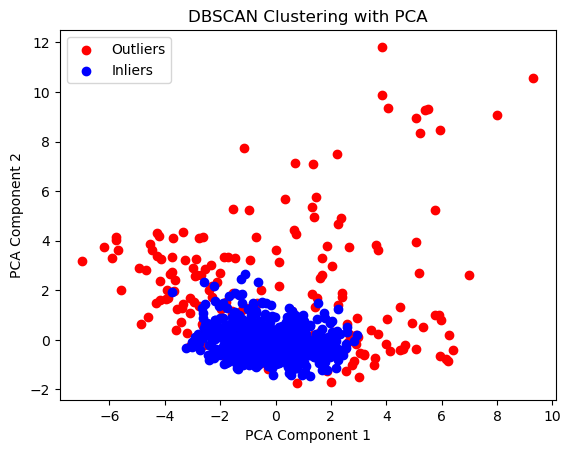

In [10]:
import numpy as np
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

X = longlist_feat[longlist_feat.columns[4:]]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

dbscan = DBSCAN(eps=2, min_samples=10)
labels = dbscan.fit_predict(X_scaled)

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

unique_labels, counts = np.unique(labels, return_counts=True)
majority_label = unique_labels[np.argmax(counts[unique_labels != -1])]
majority = labels == majority_label
outliers = labels != majority_label

# Visualize the results
plt.scatter(X_pca[majority, 0], X_pca[majority, 1], c='red', label='Outliers')
plt.scatter(X_pca[outliers, 0], X_pca[outliers, 1], c='blue', label='Inliers')
plt.legend()
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('DBSCAN Clustering with PCA')
plt.show()

In [11]:
print(unique_labels)
print(counts)

[-1  0]
[ 189 1408]


In [12]:
longlist_feat['Cluster_DBscan'] = labels
longlist_feat

/var/folders/x2/1k_rr05n63n6yyy4gcwt7lg80000gn/T/ipykernel_7546/3735383723.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  longlist_feat['Cluster_DBscan'] = labels


,Ticker,mscore,fscore,zscore,GP/CS,NI/TA,OP/GP,RE/TA,CFO/SAL,NI/CFO,CASH/CL,BV/TL,RSST,SOFTASSETS,ISSUE,Cluster_DBscan
0,A32,-2.79397,0.49848,6.76237,-0.12265,0.08623,0.52955,0.12661,0.00587,9.83866,0.18026,0.98431,0.10974,0.66435,0,0
1,AAA,-3.86643,0.37259,5.22722,-0.11680,0.03304,0.45580,0.06637,0.08246,0.46229,0.25544,0.88527,-0.05532,0.62553,0,0
2,AAM,-3.63254,0.88322,19.75009,-0.00122,-0.05677,-66.76214,-0.00949,-0.20111,0.49225,1.69371,11.61010,-0.01297,0.83726,0,-1
3,AAS,1.69346,0.32348,8.05510,-0.02272,0.00510,1.29493,0.04904,0.09747,0.06773,0.85990,1.13682,-0.50930,0.60742,0,0
4,AAT,-3.62432,0.19660,7.74551,-0.14381,0.02421,0.66023,0.13189,0.00355,13.77394,0.21399,2.74274,-0.22272,0.46514,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1592,XPH,-2.79161,0.49522,27.57365,-0.30478,0.00021,-0.26169,-0.16045,-0.55411,-0.00155,1.50844,21.60266,0.05843,0.76099,0,-1
1593,YBC,-3.15123,0.31644,1.40760,-0.07752,0.00209,0.62240,-0.03946,-0.02259,-0.09507,0.01160,0.16012,-0.00718,0.53618,0,0
1594,YBM,-3.37026,0.26232,4.99280,-0.44716,0.03168,0.29555,0.06825,0.07707,0.40495,0.09085,0.69408,-0.03809,0.50196,0,0
1595,YEG,-1.87321,15.31524,5.98909,-0.03058,-0.12997,-6.53992,-0.15833,-0.35120,0.42058,0.08441,1.74438,-0.02006,0.96994,0,0


In [13]:
flagged_dbscan = longlist_feat[longlist_feat['Cluster_DBscan'] == -1]
flagged_dbscan.shape

(189, 16)

In [14]:
def check_overlapping(flagged_df, score_name, threshold,ver='none'):    
    flagged_df = flagged_df[:threshold]
    
    if score_name == 'mscore':
        overlap_score = flagged_df[flagged_df[score_name] > -1.78]
    elif score_name == 'fscore':
        if ver == 'high':
            overlap_score = flagged_df[flagged_df[score_name] > 1.85]
        if ver == 'moderate':
            overlap_score = flagged_df[flagged_df[score_name] > 1]
    elif score_name == 'zscore':
        overlap_score = flagged_df[flagged_df[score_name] < 1.1]
    
    print("Number of overlapping firms", len(overlap_score))
    print("Percentage of overlapping firms", len(overlap_score)/ len(flagged_df))
    return overlap_score

In [15]:
overlap_mscore_1 = check_overlapping(flagged_dbscan, 'mscore', 30)

Number of overlapping firms 1
Percentage of overlapping firms 0.03333333333333333


In [16]:
overlap_mscore_2 = check_overlapping(flagged_dbscan, 'mscore', 50)

Number of overlapping firms 6
Percentage of overlapping firms 0.12


In [17]:
overlap_fscore_1 = check_overlapping(flagged_dbscan, 'fscore', 30, 'high')

Number of overlapping firms 4
Percentage of overlapping firms 0.13333333333333333


In [18]:
overlap_fscore_2 = check_overlapping(flagged_dbscan, 'fscore', 30, 'moderate')

Number of overlapping firms 7
Percentage of overlapping firms 0.23333333333333334


In [19]:
overlap_zscore_1 = check_overlapping(flagged_dbscan,'zscore', 30)

Number of overlapping firms 5
Percentage of overlapping firms 0.16666666666666666


In [20]:
flagged_lst = pd.read_excel("./data/flagged_list.xlsx", engine="openpyxl", sheet_name=None)
flagged_pridit = flagged_lst["pridit_longlist"]
flagged_pridit

,Ticker,mscore,fscore,zscore,GP/CS,NI/TA,OP/GP,RE/TA,CFO/SAL,NI/CFO,CASH/CL,BV/TL,RSST,SOFTASSETS,ISSUE,pridit_ranking
0,PPI,-6.20076,2.33738,-12.34816,0.41775,-0.29831,1.05862,-2.80229,-4.40928,-6.86371,0.00123,-0.34913,0.12738,0.98405,0,0.15295
1,BHT,-3.95835,0.00000,1.65744,0.41775,-0.04173,-66.76214,-0.45816,-6.32413,0.87172,0.00095,-0.11941,0.03998,0.99298,0,0.14151
2,V11,-3.32411,0.88855,-4.64174,0.41775,-0.05747,3.02909,-0.57491,-1.16876,-5.03736,0.00541,-0.07825,0.04434,0.99298,0,0.14081
3,AGF,-5.07594,1.04419,-6.75413,-0.13285,-0.29831,-2.17114,-1.41136,0.02195,-14.81639,0.00391,-0.10222,0.23146,0.75412,0,0.13375
4,STT,-3.14228,0.42433,-16.71291,-0.08333,-0.12463,-1.35957,-3.32678,0.01527,-9.66221,0.01098,-0.36684,0.31621,0.57749,0,0.13163
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1592,WCS,-2.02599,0.19607,16.00950,-1.11428,0.20728,0.82156,0.15105,0.26511,1.90770,3.42717,5.60785,-0.01876,0.35494,0,-0.14185
1593,DRL,-2.53304,0.21989,22.59365,-2.21788,0.20728,0.90823,0.24384,0.56990,1.07002,3.42717,12.06578,0.10432,0.28149,0,-0.14259
1594,CVN,-3.53702,0.12087,33.01572,-1.13054,0.18629,0.88848,0.22407,0.43267,1.15991,3.42717,21.57812,-0.60878,0.90060,0,-0.14318
1595,SCS,-3.30488,0.27313,22.02253,-3.00427,0.20728,0.88001,0.34866,0.72714,0.92180,0.48713,12.92790,-0.17446,0.55582,0,-0.14976


In [21]:
merge_res = pd.merge(flagged_pridit, longlist_feat[['Ticker', 'Cluster_DBscan']], on = 'Ticker')
merge_res

,Ticker,mscore,fscore,zscore,GP/CS,NI/TA,OP/GP,RE/TA,CFO/SAL,NI/CFO,CASH/CL,BV/TL,RSST,SOFTASSETS,ISSUE,pridit_ranking,Cluster_DBscan
0,PPI,-6.20076,2.33738,-12.34816,0.41775,-0.29831,1.05862,-2.80229,-4.40928,-6.86371,0.00123,-0.34913,0.12738,0.98405,0,0.15295,-1
1,BHT,-3.95835,0.00000,1.65744,0.41775,-0.04173,-66.76214,-0.45816,-6.32413,0.87172,0.00095,-0.11941,0.03998,0.99298,0,0.14151,-1
2,V11,-3.32411,0.88855,-4.64174,0.41775,-0.05747,3.02909,-0.57491,-1.16876,-5.03736,0.00541,-0.07825,0.04434,0.99298,0,0.14081,-1
3,AGF,-5.07594,1.04419,-6.75413,-0.13285,-0.29831,-2.17114,-1.41136,0.02195,-14.81639,0.00391,-0.10222,0.23146,0.75412,0,0.13375,-1
4,STT,-3.14228,0.42433,-16.71291,-0.08333,-0.12463,-1.35957,-3.32678,0.01527,-9.66221,0.01098,-0.36684,0.31621,0.57749,0,0.13163,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1592,WCS,-2.02599,0.19607,16.00950,-1.11428,0.20728,0.82156,0.15105,0.26511,1.90770,3.42717,5.60785,-0.01876,0.35494,0,-0.14185,-1
1593,DRL,-2.53304,0.21989,22.59365,-2.21788,0.20728,0.90823,0.24384,0.56990,1.07002,3.42717,12.06578,0.10432,0.28149,0,-0.14259,-1
1594,CVN,-3.53702,0.12087,33.01572,-1.13054,0.18629,0.88848,0.22407,0.43267,1.15991,3.42717,21.57812,-0.60878,0.90060,0,-0.14318,-1
1595,SCS,-3.30488,0.27313,22.02253,-3.00427,0.20728,0.88001,0.34866,0.72714,0.92180,0.48713,12.92790,-0.17446,0.55582,0,-0.14976,-1


In [22]:
thres_lst = [30, 50, 100]
for threshold in thres_lst:
    tmp = merge_res[:threshold]
    tmp = tmp['Cluster_DBscan'].value_counts().reset_index()
    tmp.columns = ['Cluter_Labels by DBScan', "Count_Overlap"]
    
    print("Threshold: ", threshold)
    print(tmp)

Threshold:  30
   Cluter_Labels by DBScan  Count_Overlap
0                        0             16
1                       -1             14
Threshold:  50
   Cluter_Labels by DBScan  Count_Overlap
0                        0             28
1                       -1             22
Threshold:  100
   Cluter_Labels by DBScan  Count_Overlap
0                        0             64
1                       -1             36


# Isolation Forest

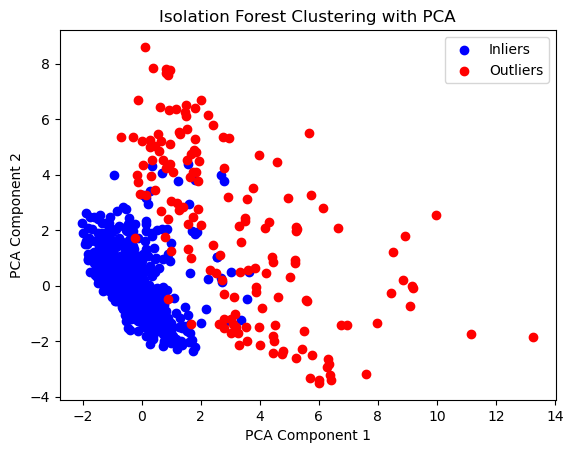

In [23]:
import numpy as np
import pandas as pd
from sklearn.ensemble import IsolationForest
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

X = longlist_feat[longlist_feat.columns[4:]]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

iso_forest = IsolationForest(contamination=0.1, random_state=42)
labels = iso_forest.fit_predict(X_scaled)
unique_labels, counts = np.unique(labels, return_counts=True)

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

inliers = labels == 1
outliers = labels == -1

# Visualize the results
plt.scatter(X_pca[inliers, 0], X_pca[inliers, 1], c='blue', label='Inliers')
plt.scatter(X_pca[outliers, 0], X_pca[outliers, 1], c='red', label='Outliers')
plt.legend()
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('Isolation Forest Clustering with PCA')
plt.show()

# # Add the labels to the original DataFrame
# longlist_feat['Cluster_Labels'] = labels

In [24]:
print(unique_labels)
print(counts)

[-1  1]
[ 160 1437]


In [25]:
longlist_feat['Cluster_IF'] = labels
longlist_feat

/var/folders/x2/1k_rr05n63n6yyy4gcwt7lg80000gn/T/ipykernel_7546/3029852392.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  longlist_feat['Cluster_IF'] = labels


,Ticker,mscore,fscore,zscore,GP/CS,NI/TA,OP/GP,RE/TA,CFO/SAL,NI/CFO,CASH/CL,BV/TL,RSST,SOFTASSETS,ISSUE,Cluster_DBscan,Cluster_IF
0,A32,-2.79397,0.49848,6.76237,-0.12265,0.08623,0.52955,0.12661,0.00587,9.83866,0.18026,0.98431,0.10974,0.66435,0,0,1
1,AAA,-3.86643,0.37259,5.22722,-0.11680,0.03304,0.45580,0.06637,0.08246,0.46229,0.25544,0.88527,-0.05532,0.62553,0,0,1
2,AAM,-3.63254,0.88322,19.75009,-0.00122,-0.05677,-66.76214,-0.00949,-0.20111,0.49225,1.69371,11.61010,-0.01297,0.83726,0,-1,-1
3,AAS,1.69346,0.32348,8.05510,-0.02272,0.00510,1.29493,0.04904,0.09747,0.06773,0.85990,1.13682,-0.50930,0.60742,0,0,1
4,AAT,-3.62432,0.19660,7.74551,-0.14381,0.02421,0.66023,0.13189,0.00355,13.77394,0.21399,2.74274,-0.22272,0.46514,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1592,XPH,-2.79161,0.49522,27.57365,-0.30478,0.00021,-0.26169,-0.16045,-0.55411,-0.00155,1.50844,21.60266,0.05843,0.76099,0,-1,1
1593,YBC,-3.15123,0.31644,1.40760,-0.07752,0.00209,0.62240,-0.03946,-0.02259,-0.09507,0.01160,0.16012,-0.00718,0.53618,0,0,1
1594,YBM,-3.37026,0.26232,4.99280,-0.44716,0.03168,0.29555,0.06825,0.07707,0.40495,0.09085,0.69408,-0.03809,0.50196,0,0,1
1595,YEG,-1.87321,15.31524,5.98909,-0.03058,-0.12997,-6.53992,-0.15833,-0.35120,0.42058,0.08441,1.74438,-0.02006,0.96994,0,0,1


In [26]:
flagged_IF = longlist_feat[longlist_feat['Cluster_IF'] == -1]
flagged_IF.shape

(160, 17)

In [27]:
overlap_mscore_1 = check_overlapping(flagged_IF, 'mscore', 30)

Number of overlapping firms 1
Percentage of overlapping firms 0.03333333333333333


In [28]:
overlap_mscore_2 = check_overlapping(flagged_IF, 'mscore', 50)

Number of overlapping firms 7
Percentage of overlapping firms 0.14


In [29]:
overlap_fscore_1 = check_overlapping(flagged_IF, 'fscore', 30, 'high')

Number of overlapping firms 3
Percentage of overlapping firms 0.1


In [30]:
overlap_fscore_2 = check_overlapping(flagged_IF, 'fscore', 30, 'moderate')

Number of overlapping firms 7
Percentage of overlapping firms 0.23333333333333334


In [31]:
overlap_zscore_1 = check_overlapping(flagged_IF,'zscore', 30)

Number of overlapping firms 6
Percentage of overlapping firms 0.2


In [32]:
merge_res = pd.merge(merge_res, longlist_feat[['Ticker', 'Cluster_IF']], on = 'Ticker')
merge_res

,Ticker,mscore,fscore,zscore,GP/CS,NI/TA,OP/GP,RE/TA,CFO/SAL,NI/CFO,CASH/CL,BV/TL,RSST,SOFTASSETS,ISSUE,pridit_ranking,Cluster_DBscan,Cluster_IF
0,PPI,-6.20076,2.33738,-12.34816,0.41775,-0.29831,1.05862,-2.80229,-4.40928,-6.86371,0.00123,-0.34913,0.12738,0.98405,0,0.15295,-1,-1
1,BHT,-3.95835,0.00000,1.65744,0.41775,-0.04173,-66.76214,-0.45816,-6.32413,0.87172,0.00095,-0.11941,0.03998,0.99298,0,0.14151,-1,-1
2,V11,-3.32411,0.88855,-4.64174,0.41775,-0.05747,3.02909,-0.57491,-1.16876,-5.03736,0.00541,-0.07825,0.04434,0.99298,0,0.14081,-1,1
3,AGF,-5.07594,1.04419,-6.75413,-0.13285,-0.29831,-2.17114,-1.41136,0.02195,-14.81639,0.00391,-0.10222,0.23146,0.75412,0,0.13375,-1,-1
4,STT,-3.14228,0.42433,-16.71291,-0.08333,-0.12463,-1.35957,-3.32678,0.01527,-9.66221,0.01098,-0.36684,0.31621,0.57749,0,0.13163,-1,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1592,WCS,-2.02599,0.19607,16.00950,-1.11428,0.20728,0.82156,0.15105,0.26511,1.90770,3.42717,5.60785,-0.01876,0.35494,0,-0.14185,-1,-1
1593,DRL,-2.53304,0.21989,22.59365,-2.21788,0.20728,0.90823,0.24384,0.56990,1.07002,3.42717,12.06578,0.10432,0.28149,0,-0.14259,-1,-1
1594,CVN,-3.53702,0.12087,33.01572,-1.13054,0.18629,0.88848,0.22407,0.43267,1.15991,3.42717,21.57812,-0.60878,0.90060,0,-0.14318,-1,-1
1595,SCS,-3.30488,0.27313,22.02253,-3.00427,0.20728,0.88001,0.34866,0.72714,0.92180,0.48713,12.92790,-0.17446,0.55582,0,-0.14976,-1,-1


In [34]:
merge_res[['Ticker', 'pridit_ranking', 'Cluster_DBscan', 'Cluster_IF']]

,Ticker,pridit_ranking,Cluster_DBscan,Cluster_IF
0,PPI,0.15295,-1,-1
1,BHT,0.14151,-1,-1
2,V11,0.14081,-1,1
3,AGF,0.13375,-1,-1
4,STT,0.13163,-1,-1
...,...,...,...,...
1592,WCS,-0.14185,-1,-1
1593,DRL,-0.14259,-1,-1
1594,CVN,-0.14318,-1,-1
1595,SCS,-0.14976,-1,-1


In [35]:
thres_lst = [30, 50, 100]
for threshold in thres_lst:
    tmp = merge_res[:threshold]
    tmp = tmp['Cluster_IF'].value_counts().reset_index()
    tmp.columns = ['Cluter_Labels by IF', "Count_Overlap"]
    
    print("Threshold: ", threshold)
    print(tmp)

Threshold:  30
   Cluter_Labels by IF  Count_Overlap
0                    1             18
1                   -1             12
Threshold:  50
   Cluter_Labels by IF  Count_Overlap
0                    1             30
1                   -1             20
Threshold:  100
   Cluter_Labels by IF  Count_Overlap
0                    1             68
1                   -1             32


# Evaluation

In [48]:
df_sector = pd.read_pickle("./data_pickle/Sector.pkl")
df_sector.head()

,Ticker,ComGroupCode,en_OrganName,en_OrganshortName,ICB_Code_L4,ICB_Name_L4,ICB_Code_L3,ICB_Name_L3,ICB_Code_L2,ICB_Name_L2,ICB_Code_L1,ICB_Name_L1,Firm_Size
0,VVS,UpcomIndex,Vietnam Machine Investment Development Joint S...,Vietnam Machine Investment Development,3353,Automobiles,3350,Automobiles & Parts,3300,Automobiles & Parts,3000,Consumer Goods,SME
1,XDC,UpcomIndex,Tan Cang Construction Joint Stock Company,Tan Cang Construction,2357,Heavy Construction,2350,Construction & Materials,2300,Construction & Materials,2000,Industrials,SME
2,SBG,VNINDEX,Siba High-tech Mechanical Group Joint Stock Co...,Siba Group Jsc,2727,Diversified Industrials,2720,General Industrials,2700,Industrial Goods & Services,2000,Industrials,SME
3,HSV,UpcomIndex,HSV Viet Nam Group Joint Stock Company,Ha Noi Iron And Steel,1757,Steel,1750,Industrial Metals & Mining,1700,Basic Resources,1000,Basic Materials,MSME
4,SCV,OTC,Vietnam National Salt Joint Stock Company,Vietnam National Salt,3577,Food Products,3570,Food Producers,3500,Food & Beverage,3000,Consumer Goods,MSME


In [49]:
df_FS = pd.merge(merge_res, df_sector[['Ticker', 'ComGroupCode', 'en_OrganshortName', 'ICB_Name_L1', 'ICB_Name_L2', 'Firm_Size']], on=['Ticker'], how='inner')
print(df_FS.shape)
df_FS.head()

(1597, 23)


,Ticker,mscore,fscore,zscore,GP/CS,NI/TA,OP/GP,RE/TA,CFO/SAL,NI/CFO,CASH/CL,BV/TL,RSST,SOFTASSETS,ISSUE,pridit_ranking,Cluster_DBscan,Cluster_IF,ComGroupCode,en_OrganshortName,ICB_Name_L1,ICB_Name_L2,Firm_Size
0,PPI,-6.20076,2.33738,-12.34816,0.41775,-0.29831,1.05862,-2.80229,-4.40928,-6.86371,0.00123,-0.34913,0.12738,0.98405,0,0.15295,-1,-1,UpcomIndex,Pacific Property,Financials,Real Estate,MSME
1,BHT,-3.95835,0.00000,1.65744,0.41775,-0.04173,-66.76214,-0.45816,-6.32413,0.87172,0.00095,-0.11941,0.03998,0.99298,0,0.14151,-1,-1,OTC,Bach Dang TMC Construction,Industrials,Construction & Materials,MSME
2,V11,-3.32411,0.88855,-4.64174,0.41775,-0.05747,3.02909,-0.57491,-1.16876,-5.03736,0.00541,-0.07825,0.04434,0.99298,0,0.14081,-1,1,UpcomIndex,Vinaconex No.11,Financials,Real Estate,MSME
3,AGF,-5.07594,1.04419,-6.75413,-0.13285,-0.29831,-2.17114,-1.41136,0.02195,-14.81639,0.00391,-0.10222,0.23146,0.75412,0,0.13375,-1,-1,UpcomIndex,An Giang Fisheries,Consumer Goods,Food & Beverage,MSME
4,STT,-3.14228,0.42433,-16.71291,-0.08333,-0.12463,-1.35957,-3.32678,0.01527,-9.66221,0.01098,-0.36684,0.31621,0.57749,0,0.13163,-1,-1,UpcomIndex,Saigon Tourist Transport,Consumer Services,Travel & Leisure,MSME


In [77]:
flagged_pridit = df_FS[:130]

In [78]:
df_FS_tmp = firm_size_counts_df_FS = df_FS['Firm_Size'].value_counts()

In [79]:
flagged_pridit_tmp = flagged_pridit['Firm_Size'].value_counts()

In [80]:
firm_size_comparison = pd.DataFrame({
    'Segment size': df_FS_tmp,
    'Flagged firm': flagged_pridit_tmp
})

In [81]:
firm_size_comparison

,Segment size,Flagged firm
MM,175,NaN
MSME,483,115.00000
SME,664,14.00000
USME,275,1.00000


In [82]:
firm_size_comparison["Rate"] = firm_size_comparison['Flagged firm'] / firm_size_comparison['Segment size']
firm_size_comparison

,Segment size,Flagged firm,Rate
MM,175,NaN,NaN
MSME,483,115.00000,0.23810
SME,664,14.00000,0.02108
USME,275,1.00000,0.00364


In [83]:
df_FS_tmp = df_FS['ICB_Name_L1'].value_counts()

In [84]:
flagged_pridit_tmp = flagged_pridit['ICB_Name_L1'].value_counts()

In [85]:
sector_comparison = pd.DataFrame({
    'Sector size': df_FS_tmp,
    'Flagged firm': flagged_pridit_tmp
})

In [86]:
sector_comparison

,Sector size,Flagged firm
Basic Materials,185,17.00000
Consumer Goods,248,21.00000
Consumer Services,133,7.00000
Financials,182,5.00000
Health Care,61,4.00000
Industrials,594,72.00000
Oil & Gas,11,NaN
Technology,26,1.00000
Telecommunications,8,1.00000
Utilities,149,2.00000


In [87]:
sector_comparison["Rate"] = sector_comparison['Flagged firm'] / sector_comparison['Sector size']
sector_comparison

,Sector size,Flagged firm,Rate
Basic Materials,185,17.00000,0.09189
Consumer Goods,248,21.00000,0.08468
Consumer Services,133,7.00000,0.05263
Financials,182,5.00000,0.02747
Health Care,61,4.00000,0.06557
Industrials,594,72.00000,0.12121
Oil & Gas,11,NaN,NaN
Technology,26,1.00000,0.03846
Telecommunications,8,1.00000,0.12500
Utilities,149,2.00000,0.01342
